In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ZukiPC\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(660611, 16)

In [4]:
train.head()

,observation_id,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
0,34d76816-cfc2-4bdd-b3a2-bf0c40b12689,Person search,2019-12-01T00:00:00+00:00,True,NaN,NaN,Male,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
1,83c87ec1-e6d4-4bbb-8e0c-159516706359,Person search,2019-12-01T00:09:00+00:00,True,NaN,NaN,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
2,8c2eae4b-035a-492f-92d6-cd27e6c900a1,Person search,2019-12-01T00:10:00+00:00,True,NaN,NaN,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
3,e63a036a-a728-4efe-8e08-7198f56d6d0a,Person search,2019-12-01T00:10:00+00:00,False,NaN,NaN,Male,18-24,NaN,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall
4,40c70aca-1f7f-4efe-8c5b-ade0f2e9937d,Person search,2019-12-01T00:12:00+00:00,True,50.368247,-4.126646,Male,18-24,NaN,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False,devon-and-cornwall


In [5]:
def prep_train(df):
    
    df_ =  df.copy()
    
    df_.Date = pd.to_datetime(df_.Date, infer_datetime_format=True)
    df_['Year'] = df_.Date.dt.year
    df_['Month'] = df_.Date.dt.month
    df_['Hour'] = df_.Date.dt.hour
    df_['Day_of_week'] = df_.Date.dt.day_name()
    df_['Week'] = df_.Date.dt.week
    
    return df_

In [6]:
train = prep_train(train)

C:\Users\ZukiPC\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [7]:
def analyse_df(data):
    
    analysis_dict = {'variables': list(data.columns.values),
                 'count': list(data.count().values),
                 'v_types': list(data.dtypes.values),
                 'n_null': list(data.isnull().sum().values),
                 'n_uniques': list(data.nunique().values)}
    
    analysis = pd.DataFrame(analysis_dict)
    
    return analysis

In [8]:
analyse_df(train)

,variables,count,v_types,n_null,n_uniques
0,observation_id,660611,object,0,660611
1,Type,660611,object,0,3
2,Date,660611,"datetime64[ns, UTC]",0,339759
3,Part of a policing operation,507047,object,153564,2
4,Latitude,548295,float64,112316,103638
5,Longitude,548295,float64,112316,105045
6,Gender,660611,object,0,3
7,Age range,660611,object,0,5
8,Self-defined ethnicity,655037,object,5574,19
9,Officer-defined ethnicity,660611,object,0,5


In [9]:
train.observation_id.nunique()

660611

# Type

In [10]:
train.Type.value_counts()

Person search                503503
Person and Vehicle search    156156
Vehicle search                  952
Name: Type, dtype: int64

<AxesSubplot:>

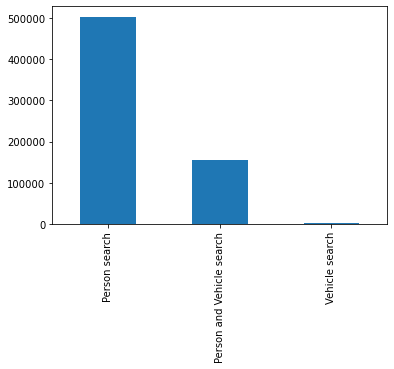

In [11]:
train.Type.value_counts().plot(kind='bar')

# Date and created time features

<AxesSubplot:>

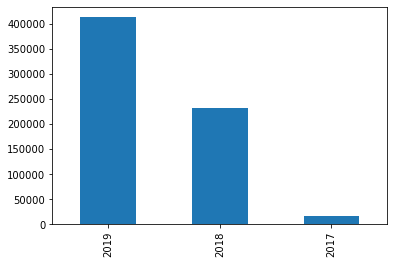

In [12]:
train.Year.value_counts().plot(kind='bar')

<AxesSubplot:>

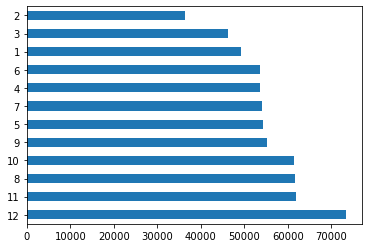

In [13]:
train.Month.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='Year,Month'>

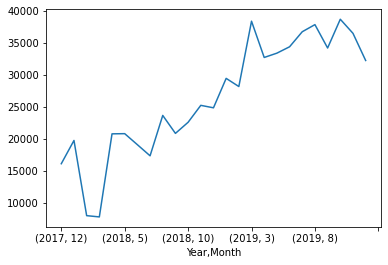

In [14]:
train.groupby(['Year', 'Month']).count()['observation_id'].plot()

# Part of a policing operation

1/4 of values missing, 153.564

<AxesSubplot:>

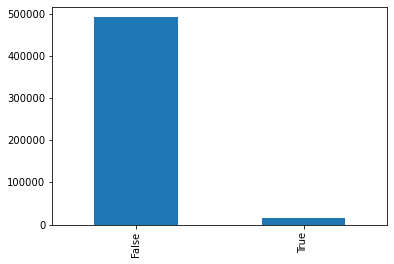

In [15]:
train['Part of a policing operation'].value_counts().plot(kind='bar')

# Gender

In [16]:
train.Gender.value_counts()

Male      605422
Female     54812
Other        377
Name: Gender, dtype: int64

In [17]:
605422/(605422+54812+377)

0.9164576430001923

In [18]:
54812/(605422+54812+377)

0.08297167319345272

<AxesSubplot:>

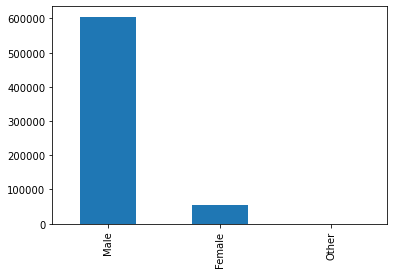

In [19]:
train.Gender.value_counts().plot(kind='bar')

In [20]:
a = train.groupby(['Officer-defined ethnicity', 'Gender']).count()['observation_id'].unstack().reset_index()
a.head()

Gender,Officer-defined ethnicity,Female,Male,Other
0,Asian,2728,83256,51
1,Black,8281,166258,54
2,Mixed,177,1652,1
3,Other,847,18976,19
4,White,42779,335280,252


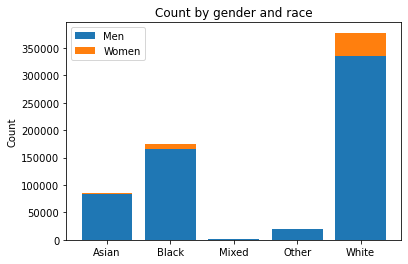

In [21]:
p1 = plt.bar(a['Officer-defined ethnicity'], a.Male)
p2 = plt.bar(a['Officer-defined ethnicity'], a.Female, bottom=a.Male)

plt.ylabel('Count')
plt.title('Count by gender and race')
plt.xticks(a['Officer-defined ethnicity'])
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

# Age range

In [22]:
train['Age range'].value_counts()

18-24       241905
25-34       158181
10-17       131763
over 34     128378
under 10       384
Name: Age range, dtype: int64

In [23]:
a = train['Age range'].value_counts().reset_index()

In [24]:
a['Percentange'] = a['Age range'].apply(lambda x: x*100/660611)
a.head()

,index,Age range,Percentange
0,18-24,241905,36.618373
1,25-34,158181,23.944651
2,10-17,131763,19.945626
3,over 34,128378,19.433222
4,under 10,384,0.058128


<AxesSubplot:ylabel='Age range'>

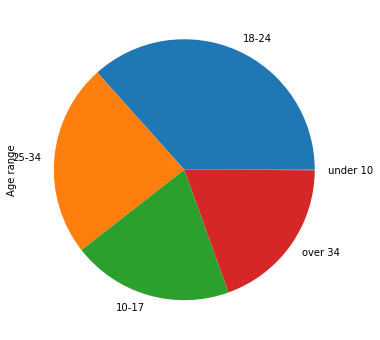

In [25]:
train['Age range'].value_counts().plot(kind='pie', figsize=(6, 6))

# Self-defined ethnicity

In [26]:
train['Self-defined ethnicity'].value_counts()

White - English/Welsh/Scottish/Northern Irish/British                                   272053
Other ethnic group - Not stated                                                          86421
White - Any other White background                                                       57875
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     54036
Black/African/Caribbean/Black British - African                                          43297
Black/African/Caribbean/Black British - Caribbean                                        31315
Asian/Asian British - Any other Asian background                                         29169
Asian/Asian British - Bangladeshi                                                        17083
Asian/Asian British - Pakistani                                                          15720
Other ethnic group - Any other ethnic group                                              11276
Mixed/Multiple ethnic groups - Any other Mixed/Mul

<AxesSubplot:>

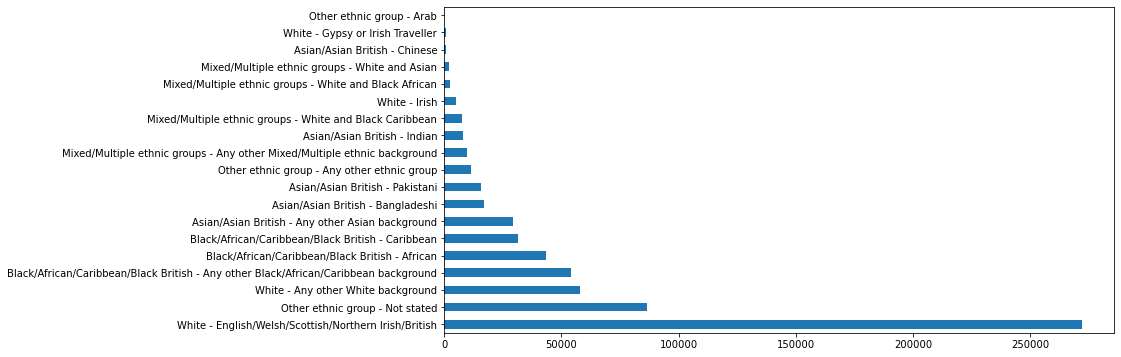

In [27]:
train['Self-defined ethnicity'].value_counts().plot(kind='barh', figsize=(12,6))

# Officer-defined ethnicity

In [28]:
train['Officer-defined ethnicity'].value_counts()

White    378311
Black    174593
Asian     86035
Other     19842
Mixed      1830
Name: Officer-defined ethnicity, dtype: int64

In [29]:
print('White: ', 378311/(378311+174593+86035+19842+1830))
print('Black: ', 174593/(378311+174593+86035+19842+1830))
print('Asian: ', 86035/(378311+174593+86035+19842+1830))
print('Other: ', 19842/(378311+174593+86035+19842+1830))
print('Mixed: ', 1830/(378311+174593+86035+19842+1830))

White:  0.5726683328009978
Black:  0.26429017984865527
Asian:  0.13023549411075505
Other:  0.03003583046603826
Mixed:  0.0027701627735535737


# Legislation

In [30]:
train.Legislation.value_counts()

Misuse of Drugs Act 1971 (section 23)                      385307
Police and Criminal Evidence Act 1984 (section 1)          224682
Criminal Justice and Public Order Act 1994 (section 60)     17259
Firearms Act 1968 (section 47)                               4352
Criminal Justice Act 1988 (section 139B)                      746
Poaching Prevention Act 1862 (section 2)                      152
Psychoactive Substances Act 2016 (s36(2))                      90
Wildlife and Countryside Act 1981 (section 19)                 31
Police and Criminal Evidence Act 1984 (section 6)              15
Aviation Security Act 1982 (section 27(1))                     11
Customs and Excise Management Act 1979 (section 163)           10
Crossbows Act 1987 (section 4)                                  5
Protection of Badgers Act 1992 (section 11)                     4
Psychoactive Substances Act 2016 (s37(2))                       4
Conservation of Seals Act 1970 (section 4)                      1
Public Sto

<AxesSubplot:>

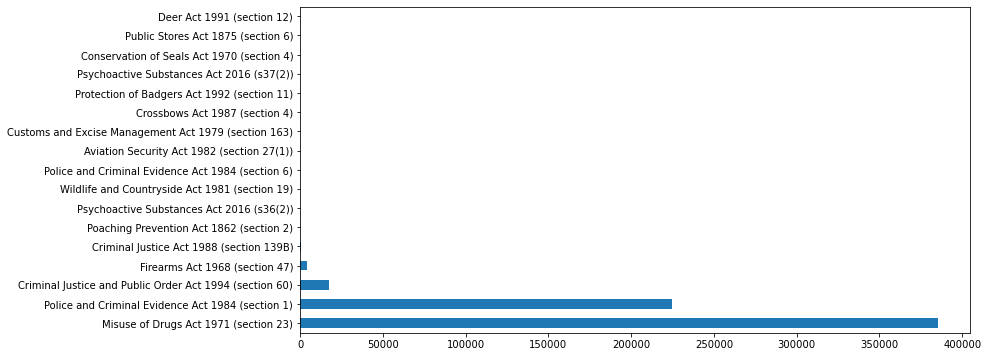

In [31]:
train.Legislation.value_counts().plot(kind='barh', figsize=(12, 6))

# Object of Search

In [32]:
train['Object of search'].value_counts()

Controlled drugs                              398873
Offensive weapons                             102107
Stolen goods                                   67636
Article for use in theft                       30836
Evidence of offences under the Act             19911
Anything to threaten or harm anyone            19762
Articles for use in criminal damage            11060
Firearms                                        5479
Fireworks                                       2948
Psychoactive substances                         1701
Detailed object of search unavailable            129
Game or poaching equipment                       102
Evidence of wildlife offences                     25
Goods on which duty has not been paid etc.        23
Crossbows                                         17
Seals or hunting equipment                         2
Name: Object of search, dtype: int64

<AxesSubplot:>

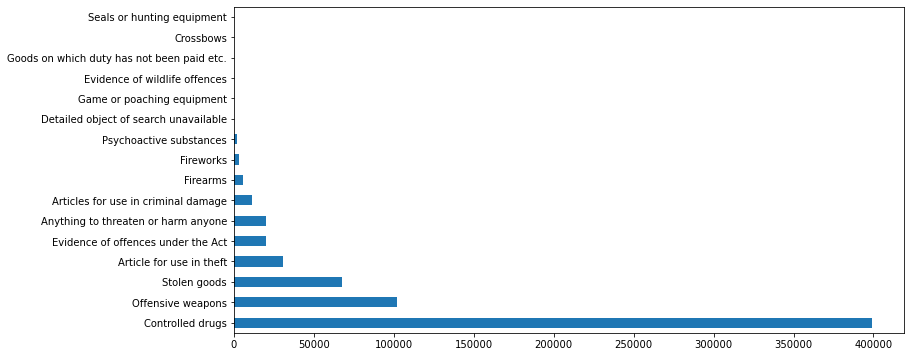

In [33]:
train['Object of search'].value_counts().plot(kind='barh', figsize=(12,6))

# Outcome

In [34]:
train.Outcome.value_counts()

A no further action disposal                                    455342
Arrest                                                           94118
Community resolution                                             41311
Khat or Cannabis warning                                         17173
Nothing found - no further action                                16188
Summons / charged by post                                        12232
Penalty Notice for Disorder                                      11214
Suspect arrested                                                  4649
Caution (simple or conditional)                                   3179
Offender given drugs possession warning                           2102
Local resolution                                                  1333
Suspect summonsed to court                                         636
Article found - Detailed outcome unavailable                       524
Offender given penalty notice                                      414
Offend

In [35]:
len(train.Outcome.unique())

16

<AxesSubplot:>

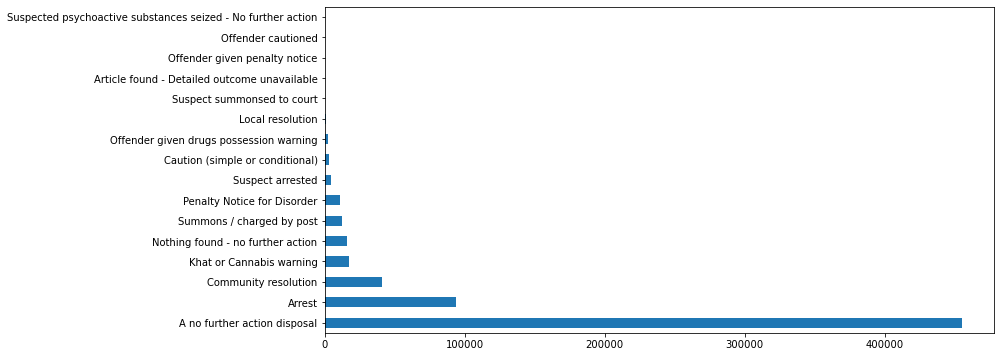

In [36]:
train.Outcome.value_counts().plot(kind='barh', figsize=(12,6))

# Outcome linked to object of search

In [37]:
train['Outcome linked to object of search'].value_counts()

True     100273
False     87238
Name: Outcome linked to object of search, dtype: int64

<AxesSubplot:>

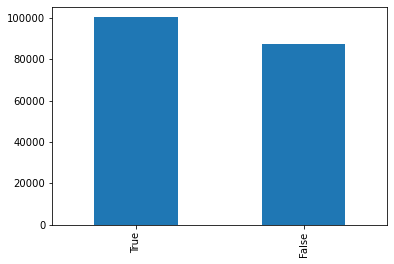

In [38]:
train['Outcome linked to object of search'].value_counts().plot(kind='bar')

# Removal of more than just outer clothing

60% of missing values, 426.549

In [39]:
train[train.Type=='Vehicle search']['Removal of more than just outer clothing'].value_counts()

False    50
True      1
Name: Removal of more than just outer clothing, dtype: int64

In [40]:
train['Removal of more than just outer clothing'].value_counts()

False    223397
True      10665
Name: Removal of more than just outer clothing, dtype: int64

<AxesSubplot:ylabel='Removal of more than just outer clothing'>

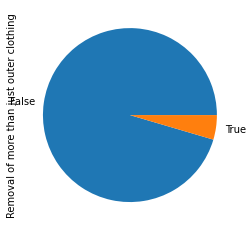

In [41]:
train['Removal of more than just outer clothing'].value_counts().plot(kind='pie')

<AxesSubplot:>

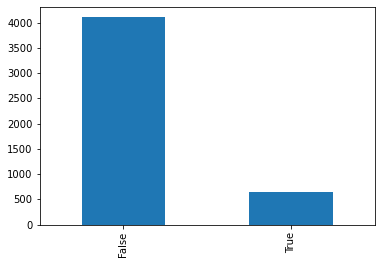

In [42]:
train[train['Removal of more than just outer clothing']==True]['Part of a policing operation'].value_counts().plot(kind='bar')

<AxesSubplot:>

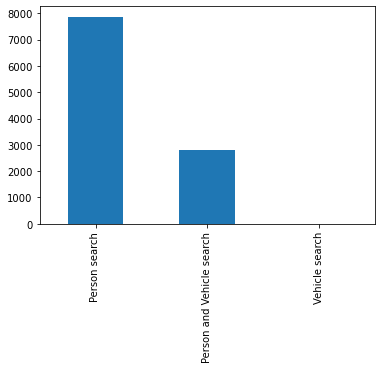

In [43]:
train[train['Removal of more than just outer clothing']==True].Type.value_counts().plot(kind='bar')

<AxesSubplot:>

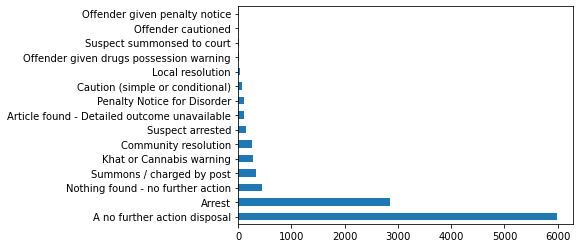

In [44]:
train[train['Removal of more than just outer clothing']==True].Outcome.value_counts().plot(kind='barh')

<AxesSubplot:>

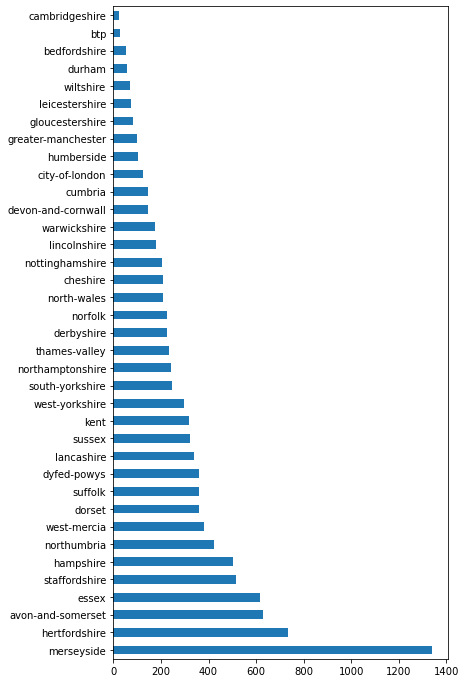

In [45]:
train[train['Removal of more than just outer clothing']==True].station.value_counts().plot(kind='barh', figsize=(6,12))

## by gender

In [46]:
train[train['Removal of more than just outer clothing']==True].Gender.value_counts()

Male      9346
Female    1307
Other       12
Name: Gender, dtype: int64

In [47]:
1307 / (9346 + 1307 + 12)

0.1225503984997656

<AxesSubplot:>

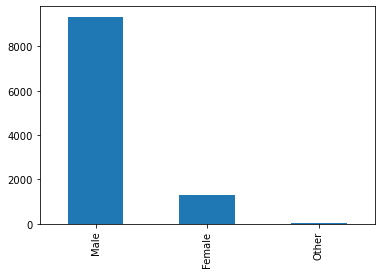

In [48]:
train[train['Removal of more than just outer clothing']==True].Gender.value_counts().plot(kind='bar')

## by race

In [49]:
train[train['Removal of more than just outer clothing']==True]['Year'].value_counts()

2019    6162
2018    4172
2017     331
Name: Year, dtype: int64

In [50]:
train[train['Removal of more than just outer clothing']==True]['Officer-defined ethnicity'].value_counts()

White    7056
Black    2313
Asian     977
Other     209
Mixed     110
Name: Officer-defined ethnicity, dtype: int64

In [51]:
977 / (2313+7056+977+209+110)

0.0916080637599625

<AxesSubplot:>

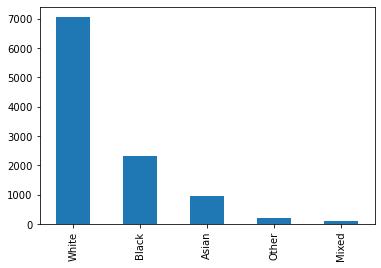

In [52]:
train[train['Removal of more than just outer clothing']==True]['Officer-defined ethnicity'].value_counts().plot(kind='bar')

In [53]:
train.groupby(['Officer-defined ethnicity', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

Removal of more than just outer clothing,False,True
Officer-defined ethnicity,,
Asian,16193,977
Black,22225,2313
Mixed,1375,110
Other,4020,209
White,179584,7056


<AxesSubplot:>

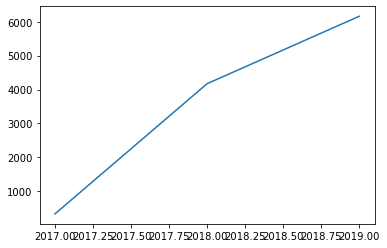

In [54]:
train[train['Removal of more than just outer clothing']==True].Year.value_counts().plot(kind='line')

In [55]:
a = train[train['Removal of more than just outer clothing']==True].groupby(['Year', 'Gender']).count()['observation_id'].unstack().reset_index()
a.head()

Gender,Year,Female,Male,Other
0,2017,50.0,281.0,NaN
1,2018,510.0,3652.0,10.0
2,2019,747.0,5413.0,2.0


# Station

In [56]:
train.station.value_counts()

metropolitan          351294
merseyside             41597
essex                  19039
thames-valley          17898
west-yorkshire         17144
hampshire              13963
hertfordshire          13328
kent                   13309
south-yorkshire        13165
surrey                 10972
avon-and-somerset      10015
btp                     9555
lancashire              9154
west-mercia             7904
devon-and-cornwall      7569
staffordshire           7318
nottinghamshire         7103
northumbria             7049
sussex                  6941
north-wales             5215
lincolnshire            5047
leicestershire          4980
greater-manchester      4851
cheshire                4845
norfolk                 4779
dyfed-powys             4315
bedfordshire            4209
humberside              3783
city-of-london          3575
northamptonshire        3526
suffolk                 3355
warwickshire            3249
gloucestershire         2871
derbyshire              2852
dorset        

<AxesSubplot:>

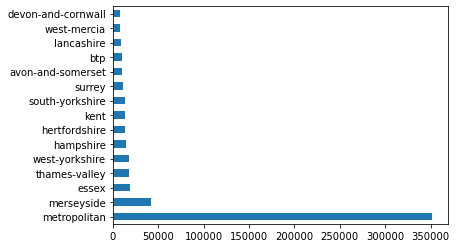

In [57]:
train.station.value_counts().head(15).plot(kind='barh')

# Pre-model analysis on possible discrimination (General)

In [202]:
stations = train.station.unique()
general_female_percentage = train[train.Gender=='Female'].shape[0]*100/ train.shape[0]
general_other_percentage =  train[train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

In [203]:
len(stations)

42

In [204]:
sorted(stations)

['avon-and-somerset',
 'bedfordshire',
 'btp',
 'cambridgeshire',
 'cheshire',
 'city-of-london',
 'cleveland',
 'cumbria',
 'derbyshire',
 'devon-and-cornwall',
 'dorset',
 'durham',
 'dyfed-powys',
 'essex',
 'gloucestershire',
 'greater-manchester',
 'gwent',
 'hampshire',
 'hertfordshire',
 'humberside',
 'kent',
 'lancashire',
 'leicestershire',
 'lincolnshire',
 'merseyside',
 'metropolitan',
 'norfolk',
 'north-wales',
 'north-yorkshire',
 'northamptonshire',
 'northumbria',
 'nottinghamshire',
 'south-yorkshire',
 'staffordshire',
 'suffolk',
 'surrey',
 'sussex',
 'thames-valley',
 'warwickshire',
 'west-mercia',
 'west-yorkshire',
 'wiltshire']

In [205]:
suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)        

In [206]:
suspected_fgender_discrimination

[]

In [207]:
suspected_ogender_discrimination

[]

In [208]:
suspected_b_et_discrimination

['metropolitan']

In [209]:
suspected_a_et_discrimination

['bedfordshire', 'west-yorkshire']

In [210]:
suspected_mo_et_discrimination

[]

# Pre-model analysis on possible discrimination by age

## '18-24'

In [211]:
general_female_percentage = train[(train['Age range']=='18-24') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='18-24') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='18-24') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='18-24') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='18-24') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='18-24') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)        

In [212]:
suspected_fgender_discrimination

[]

In [213]:
suspected_ogender_discrimination

[]

In [214]:
suspected_b_et_discrimination

['metropolitan', 'btp']

In [215]:
suspected_a_et_discrimination

['bedfordshire', 'west-yorkshire']

In [216]:
suspected_mo_et_discrimination

[]

## '25-34'

In [217]:
general_female_percentage = train[(train['Age range']=='25-34') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='25-34') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='25-34') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='25-34') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='25-34') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='25-34') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [218]:
suspected_fgender_discrimination

[]

In [219]:
suspected_ogender_discrimination

[]

In [220]:
suspected_b_et_discrimination

[]

In [221]:
suspected_a_et_discrimination

[]

In [222]:
suspected_mo_et_discrimination

[]

## '10-17'

In [223]:
general_female_percentage = train[(train['Age range']=='10-17') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='10-17') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='10-17') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='10-17') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='10-17') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='10-17') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [224]:
suspected_fgender_discrimination

[]

In [225]:
suspected_ogender_discrimination

[]

In [226]:
suspected_b_et_discrimination

['metropolitan', 'btp']

In [227]:
suspected_a_et_discrimination

[]

In [228]:
suspected_mo_et_discrimination

[]

## 'over34'

In [229]:
general_female_percentage = train[(train['Age range']=='over 34') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='over 34') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='over 34') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='over 34') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='over 34') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='over 34') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [230]:
suspected_fgender_discrimination

[]

In [231]:
suspected_ogender_discrimination

[]

In [232]:
suspected_b_et_discrimination

[]

In [233]:
suspected_a_et_discrimination

[]

In [234]:
suspected_mo_et_discrimination

[]

## 'under 10'

In [235]:
general_female_percentage = train[(train['Age range']=='under 10') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='under 10') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='under 10') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='under 10') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='under 10') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='under 10') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s) 

In [236]:
suspected_fgender_discrimination

[]

In [237]:
suspected_ogender_discrimination

[]

In [238]:
suspected_b_et_discrimination

[]

In [239]:
suspected_a_et_discrimination

[]

In [240]:
suspected_mo_et_discrimination

[]

# Answering email

In [3]:
# dropping Metropolitan because of missing target
good_stations = ['devon-and-cornwall', 'dyfed-powys', 'derbyshire', 'bedfordshire',
       'avon-and-somerset', 'cheshire', 'sussex', 'north-yorkshire',
       'cleveland', 'merseyside', 'north-wales', 'wiltshire', 'norfolk',
       'suffolk', 'thames-valley', 'durham', 'warwickshire',
       'leicestershire', 'hertfordshire', 'cumbria', 
       'essex', 'south-yorkshire', 'surrey', 'staffordshire',
       'northamptonshire', 'northumbria', 'city-of-london',
       'nottinghamshire', 'gloucestershire', 'cambridgeshire',
       'lincolnshire', 'btp', 'west-yorkshire', 'dorset', 'west-mercia',
       'kent', 'hampshire', 'humberside', 'lancashire',
       'greater-manchester', 'gwent']

In [4]:
train = train[train.station.isin(good_stations)]

In [5]:
analyse_df(train)

NameError: name 'analyse_df' is not defined

In [6]:
successful = ['Local resolution', 
              'Community resolution'
              'Offender given drugs possession warning'
              'Khat or Cannabis warning'
              'Caution (simple or conditional)'
              'Offender given penalty notice'
              'Arrest'
              'Penalty Notice for Disorder'
              'Suspected psychoactive substances seized - No further action'
              'Summons / charged by post'
              'Article found - Detailed outcome unavailable'
              'Offender cautioned'
              'Suspect arrested'
              'Suspect summonsed to court']

"If there was a search and the outcome has not been written please consider it to be False."

In [7]:
train['Outcome linked to object of search'] = (
    np.where(
        train['Outcome linked to object of search'].isnull(),
        False, 
        train['Outcome linked to object of search']))

In [8]:
train['Outcome linked to object of search'].isnull().sum()

0

In [9]:
train['Outcome linked to object of search'].value_counts()

False    209044
True     100273
Name: Outcome linked to object of search, dtype: int64

"Removal of more than just outer clothing should be filled with False, 
except when it’s just a vehicle search, in which case it makes no sense"

In [10]:
train.shape

(309317, 16)

In [11]:
train[train['Removal of more than just outer clothing'].isnull()].Type.value_counts()

Person search                55870
Person and Vehicle search    19322
Vehicle search                  63
Name: Type, dtype: int64

In [12]:
aux = train.loc[train.Type != 'Vehicle search']
aux['Removal of more than just outer clothing'] = (
    np.where(
        aux['Removal of more than just outer clothing'].isnull(),
        False,
        aux['Removal of more than just outer clothing']))
train = train.loc[train.Type == 'Vehicle search'].append(aux)

C:\Users\ZukiPC\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
train.shape

(309317, 16)

In [14]:
train[train['Removal of more than just outer clothing'].isnull()].Type.value_counts()

Vehicle search    63
Name: Type, dtype: int64

In [15]:
no_sense = train.loc[(train.Type=='Vehicle search') & (train['Removal of more than just outer clothing']==True)].index

In [16]:
train = train.drop(no_sense, axis=0)

In [17]:
train.shape

(309316, 16)

# Exclude 'other' gender

In [18]:
train = train[train.Gender.isin(['Male', 'Female'])]

In [19]:
train[train['Outcome linked to object of search']==True].groupby(['Officer-defined ethnicity', 'Age range']).count()['observation_id'].unstack()

Age range,10-17,18-24,25-34,over 34,under 10
Officer-defined ethnicity,,,,,
Asian,1277,4584,2654,1118,2
Black,2254,4913,2558,1610,12
Mixed,153,269,139,76,1
Other,307,758,519,298,2
White,12616,27466,19547,17011,65


In [20]:
train.shape

(309044, 16)

In [21]:
# train.to_csv('clean_train.csv')

In [22]:
train[train['Outcome linked to object of search']==True].groupby(['Year', 'Month']).count()['observation_id'].plot()

KeyError: 'Year'

<AxesSubplot:>

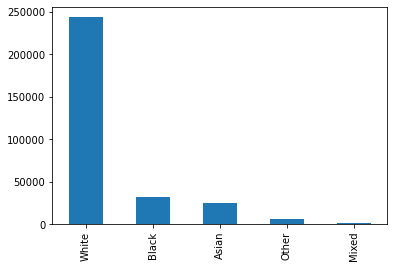

In [23]:
train['Officer-defined ethnicity'].value_counts().plot(kind='bar')

"In your analysis we expect you to check whether these generally match the self-definition, or if there is any
significant difference.""

In [ ]:
train[train['Officer-defined ethnicity']=='Black']['Self-defined ethnicity'].value_counts()

In [ ]:
train[train['Officer-defined ethnicity']=='White']['Self-defined ethnicity'].value_counts()

In [ ]:
train[train['Officer-defined ethnicity']=='Asian']['Self-defined ethnicity'].value_counts()

In [ ]:
train[train['Officer-defined ethnicity']=='Mixed']['Self-defined ethnicity'].value_counts()

In [ ]:
train[train['Officer-defined ethnicity']=='Other']['Self-defined ethnicity'].value_counts()

# Pre-model analysis on possible discrimination (General) (Clean Dataset)

In [ ]:
stations = train.station.unique()
general_female_percentage = train[train.Gender=='Female'].shape[0]*100/ train.shape[0]
general_other_percentage =  train[train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

In [ ]:
suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage > 10:
        suspected_b_et_discrimination.append(s)
    if train[(train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [ ]:
suspected_fgender_discrimination

In [ ]:
suspected_ogender_discrimination

In [ ]:
suspected_b_et_discrimination

In [ ]:
suspected_a_et_discrimination

In [ ]:
suspected_mo_et_discrimination

## '18 to 24'

In [ ]:
general_female_percentage = train[(train['Age range']=='18-24') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='18-24') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='18-24') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='18-24') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='18-24') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='18-24') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='18-24') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)   

In [ ]:
suspected_fgender_discrimination

In [ ]:
suspected_ogender_discrimination

In [ ]:
suspected_b_et_discrimination

In [ ]:
suspected_a_et_discrimination

In [ ]:
suspected_mo_et_discrimination

## '25 to 34'

In [ ]:
general_female_percentage = train[(train['Age range']=='25-34') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='25-34') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='25-34') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='25-34') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='25-34') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='25-34') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='25-34') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [ ]:
suspected_fgender_discrimination

In [ ]:
suspected_ogender_discrimination

In [ ]:
suspected_b_et_discrimination

In [ ]:
suspected_a_et_discrimination

In [ ]:
suspected_mo_et_discrimination

## '10 to 17'

In [ ]:
general_female_percentage = train[(train['Age range']=='10-17') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='10-17') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='10-17') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='10-17') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='10-17') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='10-17') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='10-17') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [ ]:
suspected_fgender_discrimination

In [ ]:
suspected_ogender_discrimination

In [ ]:
suspected_b_et_discrimination

In [ ]:
suspected_a_et_discrimination

In [ ]:
suspected_mo_et_discrimination

## 'Over 34'

In [ ]:
general_female_percentage = train[(train['Age range']=='over 34') & (train.Gender=='Female')].shape[0]*100/ train.shape[0]
general_other_percentage =  train[(train['Age range']=='over 34') & train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[(train['Age range']=='over 34') & train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[(train['Age range']=='over 34') & train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[(train['Age range']=='over 34') & train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='over 34') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='over 34') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s)  

In [ ]:
suspected_fgender_discrimination

In [ ]:
suspected_ogender_discrimination

In [ ]:
suspected_b_et_discrimination

In [ ]:
suspected_a_et_discrimination

In [ ]:
suspected_mo_et_discrimination

## 'under 10'

In [ ]:
stations = train.station.unique()
general_female_percentage = train[train.Gender=='Female'].shape[0]*100/ train.shape[0]
general_other_percentage =  train[train.Gender=='Other'].shape[0]*100/ train.shape[0]
general_black_percentage = train[train['Officer-defined ethnicity']=='Black'].shape[0]*100/ train.shape[0]
general_asian_percentage = train[train['Officer-defined ethnicity']=='Asian'].shape[0]*100/ train.shape[0]
general_mixed_other_percentage = train[train['Officer-defined ethnicity'].isin(['Mixed', 'Other'])].shape[0]*100/ train.shape[0]

suspected_fgender_discrimination = []
suspected_ogender_discrimination = []
suspected_b_et_discrimination=[]
suspected_a_et_discrimination=[]
suspected_mo_et_discrimination=[]

for s in stations:
    if train[(train['Age range']=='under 10') & (train.station==s) & (train.Gender=='Female')].shape[0]* 100/train[train.station==s].shape[0] - general_female_percentage> 10:
        suspected_fgender_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train.Gender=='Other')].shape[0] * 100 / train[train.station==s].shape[0] - general_other_percentage> 10:
        suspected_ogender_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train['Officer-defined ethnicity']=='Black')].shape[0] * 100 / train[train.station==s].shape[0] - general_black_percentage> 10:
        suspected_b_et_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train['Officer-defined ethnicity']=='Asian')].shape[0] * 100  / train[train.station==s].shape[0] - general_asian_percentage > 10:
        suspected_a_et_discrimination.append(s)
    if train[(train['Age range']=='under 10') & (train.station==s) & (train['Officer-defined ethnicity'].isin(['Mixed', 'Other']))].shape[0] * 100 / train[train.station==s].shape[0] - general_mixed_other_percentage> 10:
        suspected_mo_et_discrimination.append(s) 

In [ ]:
suspected_fgender_discrimination

In [ ]:
suspected_ogender_discrimination

In [ ]:
suspected_b_et_discrimination

In [ ]:
suspected_a_et_discrimination

In [ ]:
suspected_mo_et_discrimination=[]

In [ ]:
train.groupby(['Officer-defined ethnicity', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

In [ ]:
train.groupby(['Age range', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

In [ ]:
train.groupby(['Officer-defined ethnicity', 'Age range']).count()['observation_id'].unstack()

In [ ]:
train.groupby(['Officer-defined ethnicity', 'Gender']).count()['observation_id'].unstack()

In [ ]:
train.groupby(['Gender', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

# Sucessfull operations only

In [ ]:
train[train['Outcome linked to object of search']==True].groupby(['Officer-defined ethnicity', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

In [ ]:
train[train['Outcome linked to object of search']==True].groupby(['Age range', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

In [ ]:
train[train['Outcome linked to object of search']==True].groupby(['Gender', 'Removal of more than just outer clothing']).count()['observation_id'].unstack()

In [ ]:
analyse_df(train)

 # Precision analysis

In [ ]:
precisions = {}
for s in stations:
    precisions[s] = {}
    precisions[s]['Gender'] = {}
    for gender in list(train.Gender.unique()):
        precisions[s]['Gender'][gender] = round(train[(train.station == s)
                                      &
                                      (train['Outcome linked to object of search']==True) 
                                      & 
                                      (train.Gender == gender)].shape[0] / train[(train.station == s) & (train.Gender==gender)].shape[0],2)
    precisions[s]['Ethnicity'] = {}
    for ethnicity in list(train['Officer-defined ethnicity'].unique()):
        if train[(train.station == s) & (train['Officer-defined ethnicity'] == ethnicity)].shape[0] !=0:
            precisions[s]['Ethnicity'][ethnicity] = round(train[(train.station == s)
                                          &
                                          (train['Outcome linked to object of search']==True) 
                                          & 
                                          (train['Officer-defined ethnicity'] == ethnicity)].shape[0] / train[(train.station == s) & (train['Officer-defined ethnicity'] == ethnicity)].shape[0],2)
        else:
            precisions[s]['Enthnicity'][ethnicity] = np.nan
            
    precisions[s]['Age_Range'] = {}
    for age in list(train['Age range'].unique()):
        if train[(train.station == s) & (train['Age range'] == age)].shape[0] !=0:
            precisions[s]['Age_Range'][age] = round(train[(train.station == s)
                                          &
                                          (train['Outcome linked to object of search']==True) 
                                          & 
                                          (train['Age range'] == age)].shape[0] / train[(train.station == s) & (train['Age range'] == age)].shape[0],2)
        else:
            precisions[s]['Age_Range'][age] = np.nan

In [ ]:
for station in precisions.keys():
    for group in precisions[station].keys():
        if max(list(precisions[station][group].values())) - min(list(precisions[station][group].values()))>0.15:
            print(station, precisions[station][group])

In [ ]:
train = train[train['Removal of more than just outer clothing']==True]
precisions = {}
for s in stations:
    precisions[s] = {}
    precisions[s]['Gender'] = {}
    for gender in list(train.Gender.unique()):
        if train[(train.station == s) & (train.Gender==gender)].shape[0] != 0:
            precisions[s]['Gender'][gender] = round(train[(train.station == s)
                                          &
                                          (train['Outcome linked to object of search']==True) 
                                          & 
                                          (train.Gender == gender)].shape[0] / train[(train.station == s) & (train.Gender==gender)].shape[0],2)
        else:
         precisions[s]['Gender'][gender] = np.nan
            
    precisions[s]['Ethnicity'] = {}
    for ethnicity in list(train['Officer-defined ethnicity'].unique()):
        if train[(train.station == s) & (train['Officer-defined ethnicity'] == ethnicity)].shape[0] !=0:
            precisions[s]['Ethnicity'][ethnicity] = round(train[(train.station == s)
                                          &
                                          (train['Outcome linked to object of search']==True) 
                                          & 
                                          (train['Officer-defined ethnicity'] == ethnicity)].shape[0] / train[(train.station == s) & (train['Officer-defined ethnicity'] == ethnicity)].shape[0],2)
        else:
            precisions[s]['Ethnicity'][ethnicity] = np.nan
            
    precisions[s]['Age_Range'] = {}
    for age in list(train['Age range'].unique()):
        if train[(train.station == s) & (train['Age range'] == age)].shape[0] !=0:
            precisions[s]['Age_Range'][age] = round(train[(train.station == s)
                                          &
                                          (train['Outcome linked to object of search']==True) 
                                          & 
                                          (train['Age range'] == age)].shape[0] / train[(train.station == s) & (train['Age range'] == age)].shape[0],2)
        else:
            precisions[s]['Age_Range'][age] = np.nan

In [ ]:
for station in precisions.keys():
    for group in precisions[station].keys():
        if max(list(precisions[station][group].values())) - min(list(precisions[station][group].values()))>0.15:
            print(station, pd.DataFrame.from_dict(precisions[station][group], orient='index'))